Authors: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pingouin import madmedianrule
%matplotlib inline

**Import data**

In [2]:
subject = 'Nicolas2'
resultsFiles = os.listdir(os.path.join(os.getcwd(), 'data', subject))

# Psychophysics

In [3]:
resultsFiles

['HRD_fMRI-2020_Jul_10_1220signal.txt',
 'HRD_fMRI-2020_Jul_10_1220_0.npy',
 'HRD_fMRI-2020_Jul_10_1220_1.npy',
 'HRD_fMRI-2020_Jul_10_1220_10.npy',
 'HRD_fMRI-2020_Jul_10_1220_11.npy',
 'HRD_fMRI-2020_Jul_10_1220_12.npy',
 'HRD_fMRI-2020_Jul_10_1220_13.npy',
 'HRD_fMRI-2020_Jul_10_1220_14.npy',
 'HRD_fMRI-2020_Jul_10_1220_15.npy',
 'HRD_fMRI-2020_Jul_10_1220_16.npy',
 'HRD_fMRI-2020_Jul_10_1220_17.npy',
 'HRD_fMRI-2020_Jul_10_1220_18.npy',
 'HRD_fMRI-2020_Jul_10_1220_19.npy',
 'HRD_fMRI-2020_Jul_10_1220_2.npy',
 'HRD_fMRI-2020_Jul_10_1220_20.npy',
 'HRD_fMRI-2020_Jul_10_1220_21.npy',
 'HRD_fMRI-2020_Jul_10_1220_22.npy',
 'HRD_fMRI-2020_Jul_10_1220_23.npy',
 'HRD_fMRI-2020_Jul_10_1220_24.npy',
 'HRD_fMRI-2020_Jul_10_1220_25.npy',
 'HRD_fMRI-2020_Jul_10_1220_26.npy',
 'HRD_fMRI-2020_Jul_10_1220_27.npy',
 'HRD_fMRI-2020_Jul_10_1220_28.npy',
 'HRD_fMRI-2020_Jul_10_1220_29.npy',
 'HRD_fMRI-2020_Jul_10_1220_3.npy',
 'HRD_fMRI-2020_Jul_10_1220_30.npy',
 'HRD_fMRI-2020_Jul_10_1220_31.npy',
 '

In [48]:
df = pd.read_csv('data/Nicolas2/HRD_fMRI_2020_Jul_10_1220.csv')
df.threshold

0      NaN
1     -0.5
2     -0.5
3     17.5
4     17.5
5      7.5
6      7.5
7     -2.5
8     14.5
9     10.5
10     4.5
11    -1.5
12     4.5
13    -2.5
14     3.5
15     8.5
16     1.5
17    13.5
18    -4.5
19    -3.5
20    12.5
21    11.5
22     6.5
23    15.5
24     3.5
25     0.5
26    10.5
27    15.5
28    -3.5
29    10.5
30     0.5
31    -2.5
32    13.5
33    -5.5
34    13.5
35    -4.5
36    16.5
37    -2.5
38    14.5
39    -4.5
40    16.5
41    18.5
42    -7.5
43    18.5
44    -7.5
45    -6.5
46    -2.5
47    13.5
48    17.5
49    -2.5
50    -6.5
51     NaN
Name: threshold, dtype: float64

In [66]:
Interoposterior = np.load('data/Nicolas2/HRD_fMRI-2020_Jul_10_1220_InteroPosteriorHistory.npy')
Exteroposterior = np.load('data/Nicolas2/HRD_fMRI-2020_Jul_10_1220_ExteroPosteriorHistory.npy')

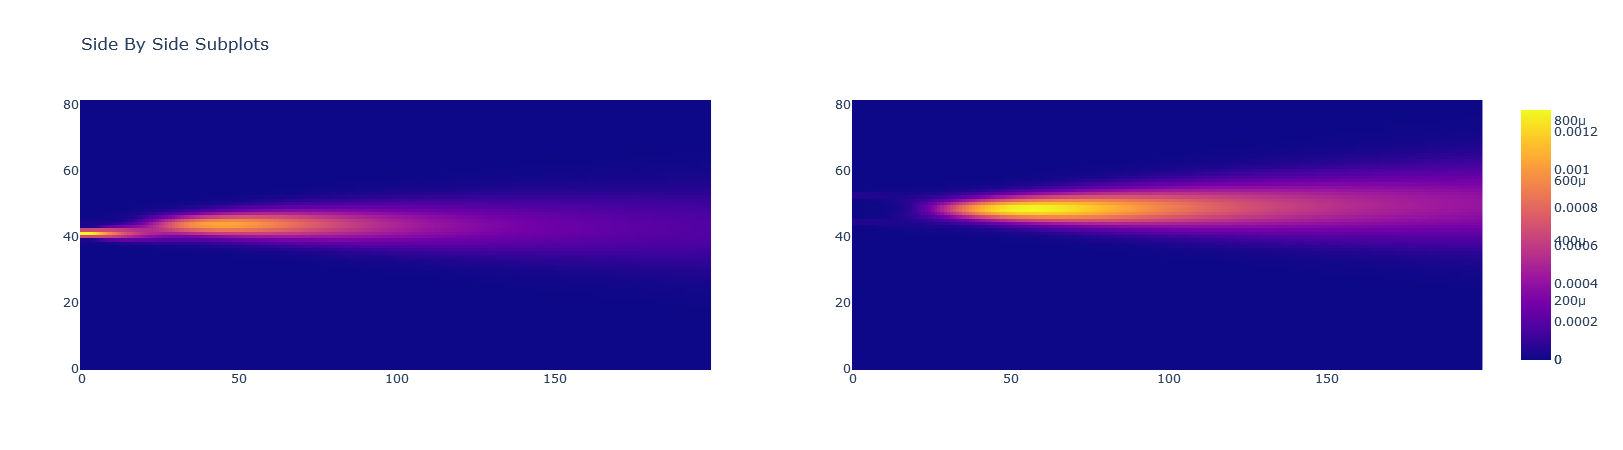

In [78]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Heatmap(z=Exteroposterior[10, :, :]), 
              row=1, col=1)

fig.add_trace(go.Heatmap(z=Interoposterior[10, :, :]), 
              row=1, col=2)

fig.update_layout(title_text="Side By Side Subplots")
fig.show()

In [26]:
import pickle
objects = []
with (open("data/test/HRD_fMRI-2020_Jul_10_0035_pickle_1.psydat", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [44]:
ar = objects[0]._psi._probLambda[0, :, :, 0]

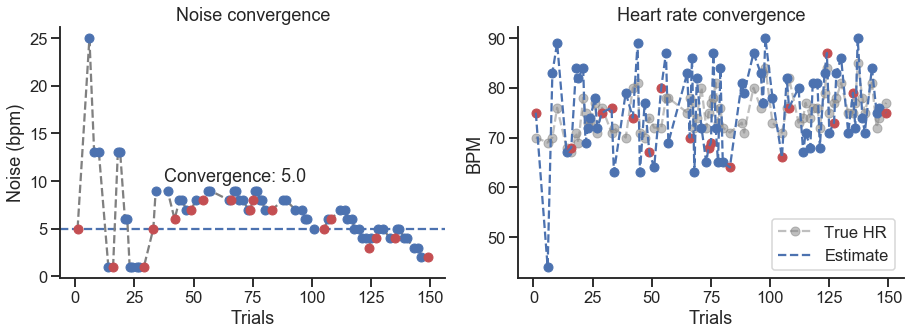

In [4]:
hrd_convergence(results_df[results_df.StairCond==1])
plt.savefig('clara_stari1.png', dpi=600)

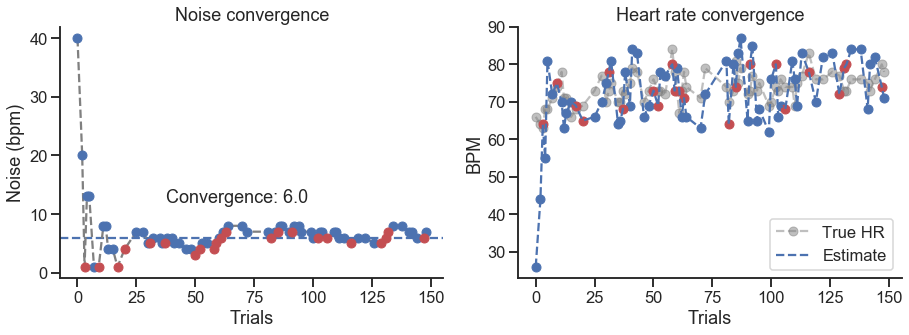

In [5]:
hrd_convergence(results_df[results_df.StairCond==0])
plt.savefig('clara_stari2.png', dpi=600)

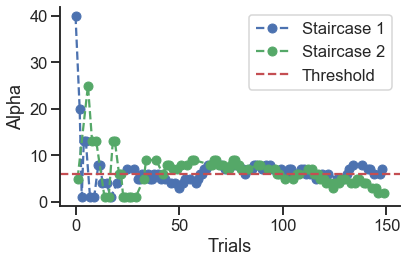

In [6]:
# staircase traces

tr1, = plt.plot(np.abs(results_df.Alpha[results_df.StairCond==0]), 'bo--')
tr2, = plt.plot(np.abs(results_df.Alpha[results_df.StairCond==1]), 'go--')
tr1.set_label('Staircase 1')
tr2.set_label('Staircase 2')

sns.despine()

# Convergence line
revers = np.abs(results_df.Alpha[results_df.Accuracy == 0])
conv = np.median(revers[~madmedianrule(revers)])
plt.axhline(y=conv, linestyle='--', color = 'r', label = 'Threshold')
#thresh.set_label('Threshold')
plt.legend()
# Text

#plt.text(len(results_df)/2, conv*2, 'Threshold: ' + str(conv))
plt.ylabel('Alpha')
plt.xlabel('Trials')

plt.tight_layout()
plt.savefig('staircases.png', dpi=600)

## Bayesian hierarchical model (requires PyMC3)

In [1]:
import pymc3 as pm

# Barplots

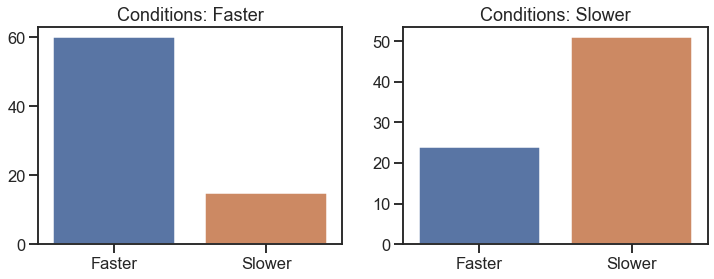

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
up = len(results_df[(results_df.Estimation == 'up') & (results_df.Condition == 'More')])
down = len(results_df[(results_df.Estimation == 'down') & (results_df.Condition == 'More')])
sns.barplot(x=['Faster', 'Slower'], y=[up, down])
plt.title('Conditions: Faster')

plt.subplot(122)
up = len(results_df[(results_df.Estimation == 'up') & (results_df.Condition == 'Less')])
down = len(results_df[(results_df.Estimation == 'down') & (results_df.Condition == 'Less')])
sns.barplot(x=['Faster', 'Slower'], y=[up, down])
plt.title('Conditions: Slower')
plt.savefig('HRD_barplot.png', dpi=600)

# Accuracy

In [8]:
len(results_df)

150

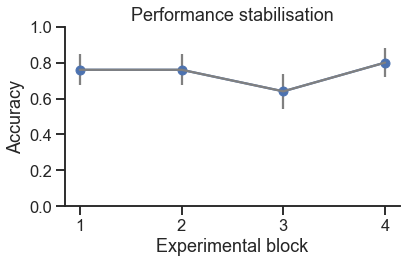

In [9]:
from scipy.stats import sem
mean, err = [], []
for x, i in enumerate(range(0, 100, 25)):
    mean.append(np.nanmean(results_df.Accuracy.iloc[i:i+25]))
    err.append(sem(results_df.Accuracy.iloc[i:i+25]))

plt.plot([1, 2, 3, 4], mean, 'o-')
plt.errorbar(x=[1, 2, 3, 4], y=mean,
             yerr=err, color='gray')
plt.ylim(0, 1)
sns.despine()
plt.xlabel('Experimental block')
plt.ylabel('Accuracy')
plt.title('Performance stabilisation')
plt.tight_layout()
plt.savefig('HRD_Accuracy.png', dpi=600)

# Metacognition

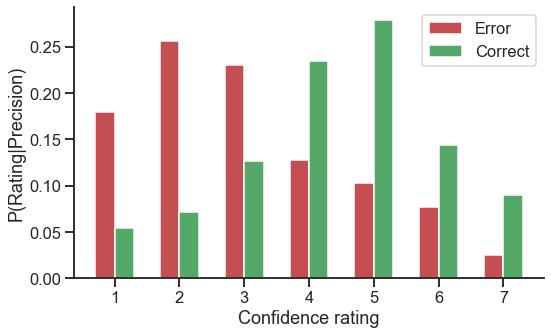

In [10]:
plot_confidence(results_df.Confidence, results_df.Accuracy)
plt.savefig('confidence2.png', dpi=600)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

# Confidence
for conf in range(1, 8):
    # Correct trials
    p = sum((accuracy == 0) & (confidence == conf)) / sum(accuracy == 0)
    if conf == 1:
        plt.bar(conf-0.15, p, width=0.30, color='r', label='Error')
    else:
        plt.bar(conf-0.15, p, width=0.30, color='r')
    # Incorrect trials
    p = sum((accuracy == 1) & (confidence == conf)) / sum(accuracy == 1)

    if conf == 1:
        plt.bar(conf+0.15, p, width=0.30, color='g', label='Correct')
    else:
        plt.bar(conf+0.15, p, width=0.30, color='g')


plt.legend()
plt.ylabel('P(Rating|Precision)')
plt.xlabel('Confidence rating')
plt.xticks(range(1, 8))
sns.despine()
plt.tight_layout()
if path is not None:
    plt.savefig(path + 'confidence.png', dpi=600)

return fig, ax

Text(0, 0.5, 'P(Rating|Accuracy)')

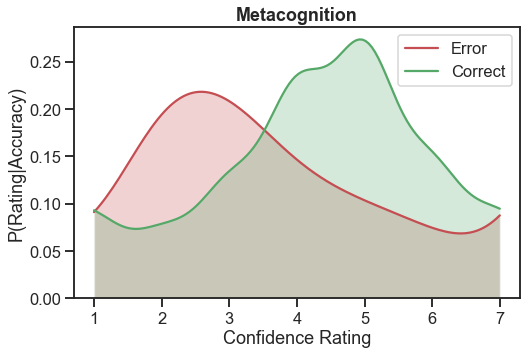

In [45]:
errConf = results_df.Confidence[results_df.Accuracy == 0]
corrConf = results_df.Confidence[results_df.Accuracy == 1]


plt.figure(figsize = (8,5))
sns.kdeplot(errConf, shade = True, label = 'Error', color = 'r', cut = 0)
sns.kdeplot(corrConf, shade = True, label = 'Correct', color = 'g', cut = 0)
plt.title('Metacognition', fontweight = 'bold')
plt.xlabel('Confidence Rating')
plt.ylabel('P(Rating|Accuracy)')



# Psychometric function using the BayesFit toolbox

References: http://www.slugocm.ca/bayesfit/

Text(0, 0.5, 'Proportion correct')

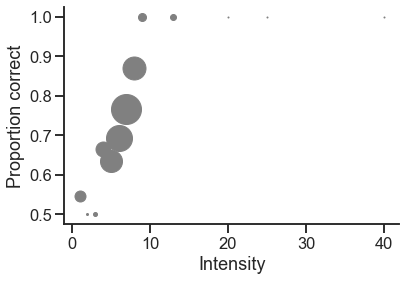

In [46]:
df = results_df.copy()
df.Alpha = np.abs(df.Alpha)
data = np.zeros((len(df.Alpha.unique()), 3))
for ii, intensity in enumerate(np.sort(df.Alpha.unique())):
    p = df[df.Alpha == intensity].Accuracy.mean()
    s= len(df[df.Alpha == intensity])
    plt.plot(intensity, p, marker='o', color='gray', markersize=s)
    
    # Store results
    data[ii, 0] = int(intensity)
    data[ii, 1] = int(len(df[(df.Alpha == intensity) & (df.Accuracy == 1)]))
    data[ii, 2] = int(len(df[(df.Alpha == intensity)]))

sns.despine()
plt.xlabel('Intensity')
plt.ylabel('Proportion correct')